<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.patches as patches


import matplotlib as mpl
import seaborn as sns
import datetime

import tqdm
import re
from string import punctuation
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import keras
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.utils import plot_model
import keras.backend as K
import tensorflow as tf

sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = [15,10]

Using TensorFlow backend.


In [2]:

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso,BayesianRidge,ElasticNet,Ridge,SGDRegressor

from sklearn.decomposition import PCA, NMF, TruncatedSVD
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import KFold,GridSearchCV,learning_curve,RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,TimeSeriesSplit
from sklearn.metrics import mean_absolute_error,mean_squared_error

from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import LinearSVR


import lightgbm as lgb

In [4]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge, ElasticNet, Ridge, SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import LinearSVR


In [3]:
train=pd.read_csv('./data/Train.csv')

train.head()

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode,Square_ID
0,34.26,-15.91,0.0,887.764222,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3896-14ce-11ea-bce5-f49634744a41
1,34.26,-15.90,0.0,743.403912,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3897-14ce-11ea-bce5-f49634744a41
2,34.26,-15.89,0.0,565.728343,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3898-14ce-11ea-bce5-f49634744a41
3,34.26,-15.88,0.0,443.392774,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c3899-14ce-11ea-bce5-f49634744a41
4,34.26,-15.87,0.0,437.443428,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c389a-14ce-11ea-bce5-f49634744a41


In [4]:
train.columns

Index(['X', 'Y', 'target_2015', 'elevation', 'precip 2014-11-16 - 2014-11-23',
       'precip 2014-11-23 - 2014-11-30', 'precip 2014-11-30 - 2014-12-07',
       'precip 2014-12-07 - 2014-12-14', 'precip 2014-12-14 - 2014-12-21',
       'precip 2014-12-21 - 2014-12-28', 'precip 2014-12-28 - 2015-01-04',
       'precip 2015-01-04 - 2015-01-11', 'precip 2015-01-11 - 2015-01-18',
       'precip 2015-01-18 - 2015-01-25', 'precip 2015-01-25 - 2015-02-01',
       'precip 2015-02-01 - 2015-02-08', 'precip 2015-02-08 - 2015-02-15',
       'precip 2015-02-15 - 2015-02-22', 'precip 2015-02-22 - 2015-03-01',
       'precip 2015-03-01 - 2015-03-08', 'precip 2015-03-08 - 2015-03-15',
       'precip 2019-01-20 - 2019-01-27', 'precip 2019-01-27 - 2019-02-03',
       'precip 2019-02-03 - 2019-02-10', 'precip 2019-02-10 - 2019-02-17',
       'precip 2019-02-17 - 2019-02-24', 'precip 2019-02-24 - 2019-03-03',
       'precip 2019-03-03 - 2019-03-10', 'precip 2019-03-10 - 2019-03-17',
       'precip 2019-0

In [1]:
import PIL as im

from PIL import Image
Image.MAX_IMAGE_PIXELS = 902016000

In [2]:
f=Image.open('./data/CHELSAcruts_prec_1_2010_V.1.0.tif')

In [ ]:
d=np.array(f)

In [5]:
f.tiffinfo()

AttributeError: 'TiffImageFile' object has no attribute 'tiffinfo'

In [10]:
#the index can be use as identifier
train.Square_ID.nunique()==len(train)

True

In [11]:
train=train.set_index('Square_ID')
train

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2019-03-17 - 2019-03-24,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode
Square_ID,,,,,,,,,,,,,,,,,,,,,
4e3c3896-14ce-11ea-bce5-f49634744a41,34.26,-15.91,0.0,887.764222,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,17.537486,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9
4e3c3897-14ce-11ea-bce5-f49634744a41,34.26,-15.90,0.0,743.403912,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,17.537486,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9
4e3c3898-14ce-11ea-bce5-f49634744a41,34.26,-15.89,0.0,565.728343,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,17.537486,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9
4e3c3899-14ce-11ea-bce5-f49634744a41,34.26,-15.88,0.0,443.392774,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,17.537486,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10
4e3c389a-14ce-11ea-bce5-f49634744a41,34.26,-15.87,0.0,437.443428,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,17.537486,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4e6f5dfd-14ce-11ea-bce5-f49634744a41,35.86,-15.44,0.0,635.675022,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,24.828982,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10
4e6f5dfe-14ce-11ea-bce5-f49634744a41,35.86,-15.43,0.0,632.598892,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,24.828982,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10
4e6f5dff-14ce-11ea-bce5-f49634744a41,35.86,-15.42,0.0,632.450136,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,24.828982,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10


In [82]:
target='target_2015'
categoric_features=['LC_Type1_mode']

numeric_features=[i for i in train.columns if not i in categoric_features and i !=target and  '2019' not in i]
target,categoric_features,numeric_features

('target_2015',
 ['LC_Type1_mode'],
 ['X',
  'Y',
  'elevation',
  'precip 2014-11-16 - 2014-11-23',
  'precip 2014-11-23 - 2014-11-30',
  'precip 2014-11-30 - 2014-12-07',
  'precip 2014-12-07 - 2014-12-14',
  'precip 2014-12-14 - 2014-12-21',
  'precip 2014-12-21 - 2014-12-28',
  'precip 2014-12-28 - 2015-01-04',
  'precip 2015-01-04 - 2015-01-11',
  'precip 2015-01-11 - 2015-01-18',
  'precip 2015-01-18 - 2015-01-25',
  'precip 2015-01-25 - 2015-02-01',
  'precip 2015-02-01 - 2015-02-08',
  'precip 2015-02-08 - 2015-02-15',
  'precip 2015-02-15 - 2015-02-22',
  'precip 2015-02-22 - 2015-03-01',
  'precip 2015-03-01 - 2015-03-08',
  'precip 2015-03-08 - 2015-03-15',
  'Square_ID'])

In [13]:
# def deriv_columns_y(column):
#     train[column+'_y']=0
#     for i , j in train.groupby(['X']):
# #         print(train.loc[train.X==i])
#         train.loc[train.X==i,column+'_y']=j[column].diff(1)
# def deriv_columns_x(column):
#     train[column+'_x']=0
#     for i , j in train.groupby(['X']):
# #         print(train.loc[train.X==i])
#         train.loc[train.X==i,column+'_x']=j[column].diff(1)
# for k in [k for k in train.columns if k not in ['LC_Type1_mode',target,'X','Y']]:
#     deriv_columns_x(k)
#     deriv_columns_y(k)    

In [83]:
train.head()

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode,Square_ID
0,34.26,-15.91,0.0,887.764222,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3896-14ce-11ea-bce5-f49634744a41
1,34.26,-15.90,0.0,743.403912,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3897-14ce-11ea-bce5-f49634744a41
2,34.26,-15.89,0.0,565.728343,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3898-14ce-11ea-bce5-f49634744a41
3,34.26,-15.88,0.0,443.392774,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c3899-14ce-11ea-bce5-f49634744a41
4,34.26,-15.87,0.0,437.443428,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c389a-14ce-11ea-bce5-f49634744a41


In [15]:
train.X.max(),train.Y.max()

(35.86, -15.21)

In [16]:
for k in train.columns:
    print(f'{k}>>>>{train[k].unique()}')

X>>>>[34.26 34.27 34.28 34.29 34.3  34.31 34.32 34.33 34.34 34.35 34.36 34.37
 34.38 34.39 34.4  34.41 34.42 34.43 34.44 34.45 34.46 34.47 34.48 34.49
 34.5  34.51 34.52 34.53 34.54 34.55 34.56 34.57 34.58 34.59 34.6  34.61
 34.62 34.63 34.64 34.65 34.66 34.67 34.68 34.69 34.7  34.71 34.72 34.73
 34.74 34.75 34.76 34.77 34.78 34.79 34.8  34.81 34.82 34.83 34.84 34.85
 34.86 34.87 34.88 34.89 34.9  34.91 34.92 34.93 34.94 34.95 34.96 34.97
 34.98 34.99 35.   35.01 35.02 35.03 35.04 35.05 35.06 35.07 35.08 35.09
 35.1  35.11 35.12 35.13 35.14 35.15 35.16 35.17 35.18 35.19 35.2  35.21
 35.22 35.23 35.24 35.25 35.26 35.27 35.28 35.29 35.3  35.31 35.32 35.33
 35.34 35.35 35.36 35.37 35.38 35.39 35.4  35.41 35.42 35.43 35.44 35.45
 35.46 35.47 35.48 35.49 35.5  35.51 35.52 35.53 35.54 35.55 35.56 35.57
 35.58 35.59 35.6  35.61 35.62 35.63 35.64 35.65 35.66 35.67 35.68 35.69
 35.7  35.71 35.72 35.73 35.74 35.75 35.76 35.77 35.78 35.79 35.8  35.81
 35.82 35.83 35.84 35.85 35.86]
Y>>>>[-15.91 -

precip 2019-01-20 - 2019-01-27_y>>>>[            nan  0.00000000e+00  2.66821173e-01  2.65974121e-01
  8.22101829e-01 -3.46501886e+00 -2.30270241e+00 -3.47232903e+00
 -2.29897748e+00 -3.47605395e+00 -2.29167914e+00 -3.48335229e+00
  8.21254778e-01  2.68575709e-01  8.19500241e-01 -1.11785772e+00
 -4.69985437e-01 -4.61882240e+00 -1.37948399e+00 -1.12578579e+00
 -1.38386331e+00 -1.12140647e+00 -2.31001257e+00 -4.68493420e-01
 -4.62031442e+00 -4.55228816e-01 -4.63357902e+00 -1.38741206e+00
 -4.53779043e-01 -4.63502879e+00 -1.06064162e-02  1.06064162e-02
 -1.27897068e+00 -1.05275882e+00  1.87628762e-02 -1.60474560e-02
 -2.71542020e-03 -1.87628762e-02  2.71542020e-03  1.74562726e-02
 -1.40881660e-03  1.40881660e-03 -2.01716928e-02  2.82663530e-03
 -1.41781870e-03 -1.88183204e-02 -2.38250828e+00 -3.63312612e+00
 -7.81759200e-03  7.81759200e-03  5.88996700e-04 -1.17425370e-03
 -7.79455900e-03  7.79455900e-03  1.12805210e-03 -1.12805210e-03
  6.66650690e-03  2.13428608e-01  6.75341160e-01 -6.88

In [84]:
sample=pd.read_csv('./data/SampleSubmission.csv')
sample

,Square_ID,target_2019
0,4e3c3896-14ce-11ea-bce5-f49634744a41,0.109
1,4e3c3897-14ce-11ea-bce5-f49634744a41,0.504
2,4e3c3898-14ce-11ea-bce5-f49634744a41,0.021
3,4e3c3899-14ce-11ea-bce5-f49634744a41,0.827
4,4e3c389a-14ce-11ea-bce5-f49634744a41,0.786
...,...,...
16461,4e6f5dfd-14ce-11ea-bce5-f49634744a41,0.762
16462,4e6f5dfe-14ce-11ea-bce5-f49634744a41,0.932
16463,4e6f5dff-14ce-11ea-bce5-f49634744a41,0.526
16464,4e6f5e00-14ce-11ea-bce5-f49634744a41,0.314


In [85]:
def generate_pipeline(model,cat_features,num_features):
    # We create the preprocessing pipelines for both numeric and categorical data.
    
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])
    categorical_features = cat_features
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(missing_values=np.nan,strategy='constant', fill_value=-999)),
       
        
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num_features),
            ('cat', categorical_transformer, categorical_features)])
    
    # Append classifier to preprocessing pipeline.
    # Now we have a full prediction pipeline.
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier',model)])
    return clf 

In [86]:
models = (("RandomForestRegressor", RandomForestRegressor(n_jobs=-1, random_state=0)), 
         ("XGBRegressor", XGBRegressor(n_estimators=150,n_jobs=-1)),
          ("SGDRegressor", SGDRegressor(random_state=0)),
          ("GradientBoostingRegressor", GradientBoostingRegressor(random_state=0)),
          ("LGBMRegressor", lgb.LGBMRegressor()),
#           ("LogisticRegression", LogisticRegression()),
          ("BaggingRegressor", BaggingRegressor(base_estimator=GradientBoostingRegressor())),
          ("BayesianRidge", BayesianRidge()),
          (" ElasticNet",  ElasticNet()),
          ("Ridge", Ridge()),   
         )

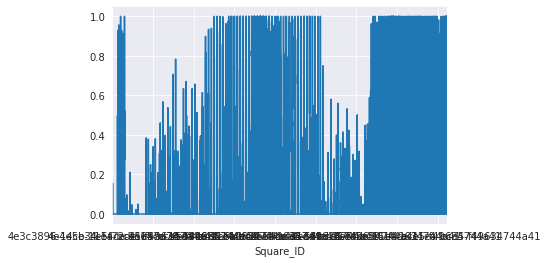

In [12]:
train[target].plot()

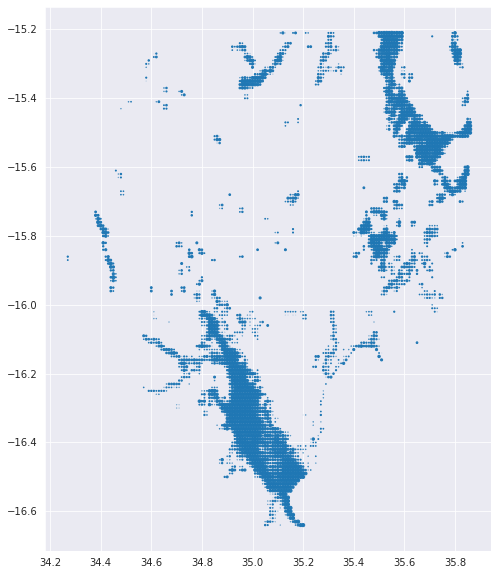

In [158]:
figure=plt.figure(figsize=(8,10))
plt.scatter(train["X"].values,train["Y"].values,train[target]*10)

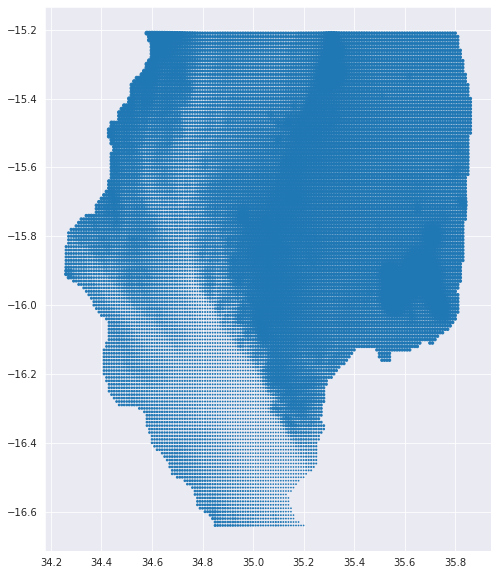

In [118]:
figure=plt.figure(figsize=(8,10))
plt.scatter(train["X"].values,train["Y"].values,train["elevation"]/100)

In [126]:
train

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode,elevation_x,elevation_y
Square_ID,,,,,,,,,,,,,,,,,,,,,
4e3c3896-14ce-11ea-bce5-f49634744a41,34.26,-15.91,0.0,887.764222,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,NaN,NaN
4e3c3897-14ce-11ea-bce5-f49634744a41,34.26,-15.90,0.0,743.403912,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,-144.360310,-144.360310
4e3c3898-14ce-11ea-bce5-f49634744a41,34.26,-15.89,0.0,565.728343,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,-177.675569,-177.675569
4e3c3899-14ce-11ea-bce5-f49634744a41,34.26,-15.88,0.0,443.392774,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10,-122.335570,-122.335570
4e3c389a-14ce-11ea-bce5-f49634744a41,34.26,-15.87,0.0,437.443428,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10,-5.949345,-5.949345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4e6f5dfd-14ce-11ea-bce5-f49634744a41,35.86,-15.44,0.0,635.675022,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10,3.815027,3.815027
4e6f5dfe-14ce-11ea-bce5-f49634744a41,35.86,-15.43,0.0,632.598892,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10,-3.076130,-3.076130
4e6f5dff-14ce-11ea-bce5-f49634744a41,35.86,-15.42,0.0,632.450136,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10,-0.148756,-0.148756


/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


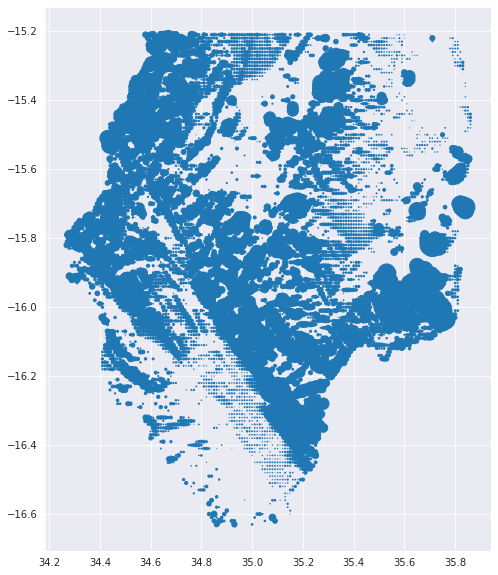

In [119]:
figure=plt.figure(figsize=(8,10))
plt.scatter(train["X"].values,train["Y"].values,train["elevation_x"])


/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


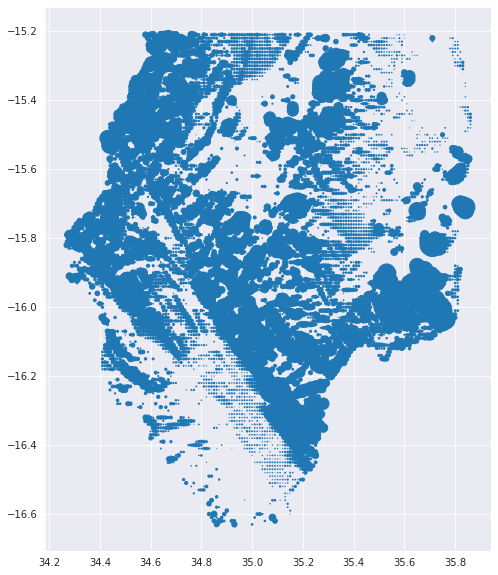

In [120]:
figure=plt.figure(figsize=(8,10))
plt.scatter(train["X"].values,train["Y"].values,train["elevation_y"])

In [87]:
target='target_2015'
categoric_features=['LC_Type1_mode']

numeric_features=[i for i in train.columns if not i in categoric_features and i !=target and  '2019' not in i]
target,categoric_features,numeric_features

('target_2015',
 ['LC_Type1_mode'],
 ['X',
  'Y',
  'elevation',
  'precip 2014-11-16 - 2014-11-23',
  'precip 2014-11-23 - 2014-11-30',
  'precip 2014-11-30 - 2014-12-07',
  'precip 2014-12-07 - 2014-12-14',
  'precip 2014-12-14 - 2014-12-21',
  'precip 2014-12-21 - 2014-12-28',
  'precip 2014-12-28 - 2015-01-04',
  'precip 2015-01-04 - 2015-01-11',
  'precip 2015-01-11 - 2015-01-18',
  'precip 2015-01-18 - 2015-01-25',
  'precip 2015-01-25 - 2015-02-01',
  'precip 2015-02-01 - 2015-02-08',
  'precip 2015-02-08 - 2015-02-15',
  'precip 2015-02-15 - 2015-02-22',
  'precip 2015-02-22 - 2015-03-01',
  'precip 2015-03-01 - 2015-03-08',
  'precip 2015-03-08 - 2015-03-15',
  'Square_ID'])

In [20]:
cv = KFold(n_splits=3, random_state=0)
X=train[categoric_features+numeric_features]
Y=train[target]

results = {}
for name, model in models:
    print(f">>>>> {name}")
    results[name] = []
    for _train, test in cv.split(X, Y):
        X_train, y_train = X.iloc[_train], Y.iloc[_train]
        X_test, y_test = X.iloc[test], Y.iloc[test]
        clf=generate_pipeline(model,categoric_features,numeric_features)
        clf.fit(X_train, y_train.values)
        y_pred = clf.predict(X_test)
        
        results[name].append(np.sqrt(mean_squared_error(y_test,y_pred)))
#         print("model score: %.3f" % a)
        
sorted([(k, np.mean(v)) for k,v in results.items()], key=lambda x: x[1])
# [('GradientBoostingRegressor', 0.1836993754370809),
#  ('RandomForestRegressor', 0.21112152283924948),
#  ('SGDRegressor', 0.35880223198723415),
#  ('XGBRegressor', 0.3697789362585329)]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


>>>>> RandomForestRegressor
>>>>> XGBRegressor
[16:00:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:00:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:00:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
>>>>> SGDRegressor
>>>>> GradientBoostingRegressor
>>>>> LGBMRegressor
>>>>> BaggingRegressor
>>>>> BayesianRidge
>>>>>  ElasticNet
>>>>> Ridge


[('BaggingRegressor', 0.1801968133915878),
 ('GradientBoostingRegressor', 0.18065477621190276),
 ('XGBRegressor', 0.1814204884099231),
 ('LGBMRegressor', 0.18994775157532776),
 ('RandomForestRegressor', 0.19960304349358982),
 (' ElasticNet', 0.22359843057676876),
 ('BayesianRidge', 0.3978588287830081),
 ('Ridge', 0.42606631937436495),
 ('SGDRegressor', 517485312.0304977)]

In [88]:
num_test=[i for i in train.columns if not i in categoric_features and i !=target and  '2015' not in i and '2014' not in i ]
num_test

['X',
 'Y',
 'elevation',
 'precip 2019-01-20 - 2019-01-27',
 'precip 2019-01-27 - 2019-02-03',
 'precip 2019-02-03 - 2019-02-10',
 'precip 2019-02-10 - 2019-02-17',
 'precip 2019-02-17 - 2019-02-24',
 'precip 2019-02-24 - 2019-03-03',
 'precip 2019-03-03 - 2019-03-10',
 'precip 2019-03-10 - 2019-03-17',
 'precip 2019-03-17 - 2019-03-24',
 'precip 2019-03-24 - 2019-03-31',
 'precip 2019-03-31 - 2019-04-07',
 'precip 2019-04-07 - 2019-04-14',
 'precip 2019-04-14 - 2019-04-21',
 'precip 2019-04-21 - 2019-04-28',
 'precip 2019-04-28 - 2019-05-05',
 'precip 2019-05-05 - 2019-05-12',
 'precip 2019-05-12 - 2019-05-19',
 'Square_ID']

In [69]:
train.columns

Index(['X', 'Y', 'target_2015', 'elevation', 'precip 2014-11-16 - 2014-11-23',
       'precip 2014-11-23 - 2014-11-30', 'precip 2014-11-30 - 2014-12-07',
       'precip 2014-12-07 - 2014-12-14', 'precip 2014-12-14 - 2014-12-21',
       'precip 2014-12-21 - 2014-12-28',
       ...
       'precip 2019-04-14 - 2019-04-21_x', 'precip 2019-04-14 - 2019-04-21_y',
       'precip 2019-04-21 - 2019-04-28_x', 'precip 2019-04-21 - 2019-04-28_y',
       'precip 2019-04-28 - 2019-05-05_x', 'precip 2019-04-28 - 2019-05-05_y',
       'precip 2019-05-05 - 2019-05-12_x', 'precip 2019-05-05 - 2019-05-12_y',
       'precip 2019-05-12 - 2019-05-19_x', 'precip 2019-05-12 - 2019-05-19_y'],
      dtype='object', length=109)

In [154]:
def generate_submit(model,name='submit.csv'):
    num_test=[i for i in train.columns if not i in categoric_features and i !=target and  '2015' not in i and '2014' not in i ]
    
    X=train[categoric_features+numeric_features]
    print(len(num_test))
    Y=train[target]
    clf=generate_pipeline(model,categoric_features,numeric_features)
    clf.fit(X,Y)
    test=train[categoric_features+num_test]
    print(test.columns,X.columns)
    test.columns=X.columns
    pred=clf.predict(test)
    df_out=pd.DataFrame(pred,test.index)
    df_out=df_out.reset_index()
    df_out.columns=sample.columns
    df_out.loc[df_out.target_2019<0,'target_2019']=0
    df_out.loc[df_out.target_2019>1,'target_2019']=1
    
    df_out.to_csv(f'./data/{name}',index=False)
    return pred


In [155]:
pred=generate_submit(BaggingRegressor(base_estimator=GradientBoostingRegressor()),'submit.csv')

56
Index(['LC_Type1_mode', 'X', 'Y', 'elevation',
       'precip 2019-01-20 - 2019-01-27', 'precip 2019-01-27 - 2019-02-03',
       'precip 2019-02-03 - 2019-02-10', 'precip 2019-02-10 - 2019-02-17',
       'precip 2019-02-17 - 2019-02-24', 'precip 2019-02-24 - 2019-03-03',
       'precip 2019-03-03 - 2019-03-10', 'precip 2019-03-10 - 2019-03-17',
       'precip 2019-03-17 - 2019-03-24', 'precip 2019-03-24 - 2019-03-31',
       'precip 2019-03-31 - 2019-04-07', 'precip 2019-04-07 - 2019-04-14',
       'precip 2019-04-14 - 2019-04-21', 'precip 2019-04-21 - 2019-04-28',
       'precip 2019-04-28 - 2019-05-05', 'precip 2019-05-05 - 2019-05-12',
       'precip 2019-05-12 - 2019-05-19', 'elevation_x', 'elevation_y',
       'precip 2019-01-20 - 2019-01-27_x', 'precip 2019-01-20 - 2019-01-27_y',
       'precip 2019-01-27 - 2019-02-03_x', 'precip 2019-01-27 - 2019-02-03_y',
       'precip 2019-02-03 - 2019-02-10_x', 'precip 2019-02-03 - 2019-02-10_y',
       'precip 2019-02-10 - 2019-02-17_x',

1.0722545323849686

In [156]:
for model in models:
    generate_submit(model[1],model[0]+'.csv')

56
Index(['LC_Type1_mode', 'X', 'Y', 'elevation',
       'precip 2019-01-20 - 2019-01-27', 'precip 2019-01-27 - 2019-02-03',
       'precip 2019-02-03 - 2019-02-10', 'precip 2019-02-10 - 2019-02-17',
       'precip 2019-02-17 - 2019-02-24', 'precip 2019-02-24 - 2019-03-03',
       'precip 2019-03-03 - 2019-03-10', 'precip 2019-03-10 - 2019-03-17',
       'precip 2019-03-17 - 2019-03-24', 'precip 2019-03-24 - 2019-03-31',
       'precip 2019-03-31 - 2019-04-07', 'precip 2019-04-07 - 2019-04-14',
       'precip 2019-04-14 - 2019-04-21', 'precip 2019-04-21 - 2019-04-28',
       'precip 2019-04-28 - 2019-05-05', 'precip 2019-05-05 - 2019-05-12',
       'precip 2019-05-12 - 2019-05-19', 'elevation_x', 'elevation_y',
       'precip 2019-01-20 - 2019-01-27_x', 'precip 2019-01-20 - 2019-01-27_y',
       'precip 2019-01-27 - 2019-02-03_x', 'precip 2019-01-27 - 2019-02-03_y',
       'precip 2019-02-03 - 2019-02-10_x', 'precip 2019-02-03 - 2019-02-10_y',
       'precip 2019-02-10 - 2019-02-17_x',

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Index(['LC_Type1_mode', 'X', 'Y', 'elevation',
       'precip 2019-01-20 - 2019-01-27', 'precip 2019-01-27 - 2019-02-03',
       'precip 2019-02-03 - 2019-02-10', 'precip 2019-02-10 - 2019-02-17',
       'precip 2019-02-17 - 2019-02-24', 'precip 2019-02-24 - 2019-03-03',
       'precip 2019-03-03 - 2019-03-10', 'precip 2019-03-10 - 2019-03-17',
       'precip 2019-03-17 - 2019-03-24', 'precip 2019-03-24 - 2019-03-31',
       'precip 2019-03-31 - 2019-04-07', 'precip 2019-04-07 - 2019-04-14',
       'precip 2019-04-14 - 2019-04-21', 'precip 2019-04-21 - 2019-04-28',
       'precip 2019-04-28 - 2019-05-05', 'precip 2019-05-05 - 2019-05-12',
       'precip 2019-05-12 - 2019-05-19', 'elevation_x', 'elevation_y',
       'precip 2019-01-20 - 2019-01-27_x', 'precip 2019-01-20 - 2019-01-27_y',
       'precip 2019-01-27 - 2019-02-03_x', 'precip 2019-01-27 - 2019-02-03_y',
       'precip 2019-02-03 - 2019-02-10_x', 'precip 2019-02-03 - 2019-02-10_y',
       'precip 2019-02-10 - 2019-02-17_x', 'p

Index(['LC_Type1_mode', 'X', 'Y', 'elevation',
       'precip 2019-01-20 - 2019-01-27', 'precip 2019-01-27 - 2019-02-03',
       'precip 2019-02-03 - 2019-02-10', 'precip 2019-02-10 - 2019-02-17',
       'precip 2019-02-17 - 2019-02-24', 'precip 2019-02-24 - 2019-03-03',
       'precip 2019-03-03 - 2019-03-10', 'precip 2019-03-10 - 2019-03-17',
       'precip 2019-03-17 - 2019-03-24', 'precip 2019-03-24 - 2019-03-31',
       'precip 2019-03-31 - 2019-04-07', 'precip 2019-04-07 - 2019-04-14',
       'precip 2019-04-14 - 2019-04-21', 'precip 2019-04-21 - 2019-04-28',
       'precip 2019-04-28 - 2019-05-05', 'precip 2019-05-05 - 2019-05-12',
       'precip 2019-05-12 - 2019-05-19', 'elevation_x', 'elevation_y',
       'precip 2019-01-20 - 2019-01-27_x', 'precip 2019-01-20 - 2019-01-27_y',
       'precip 2019-01-27 - 2019-02-03_x', 'precip 2019-01-27 - 2019-02-03_y',
       'precip 2019-02-03 - 2019-02-10_x', 'precip 2019-02-03 - 2019-02-10_y',
       'precip 2019-02-10 - 2019-02-17_x', 'p

Index(['LC_Type1_mode', 'X', 'Y', 'elevation',
       'precip 2019-01-20 - 2019-01-27', 'precip 2019-01-27 - 2019-02-03',
       'precip 2019-02-03 - 2019-02-10', 'precip 2019-02-10 - 2019-02-17',
       'precip 2019-02-17 - 2019-02-24', 'precip 2019-02-24 - 2019-03-03',
       'precip 2019-03-03 - 2019-03-10', 'precip 2019-03-10 - 2019-03-17',
       'precip 2019-03-17 - 2019-03-24', 'precip 2019-03-24 - 2019-03-31',
       'precip 2019-03-31 - 2019-04-07', 'precip 2019-04-07 - 2019-04-14',
       'precip 2019-04-14 - 2019-04-21', 'precip 2019-04-21 - 2019-04-28',
       'precip 2019-04-28 - 2019-05-05', 'precip 2019-05-05 - 2019-05-12',
       'precip 2019-05-12 - 2019-05-19', 'elevation_x', 'elevation_y',
       'precip 2019-01-20 - 2019-01-27_x', 'precip 2019-01-20 - 2019-01-27_y',
       'precip 2019-01-27 - 2019-02-03_x', 'precip 2019-01-27 - 2019-02-03_y',
       'precip 2019-02-03 - 2019-02-10_x', 'precip 2019-02-03 - 2019-02-10_y',
       'precip 2019-02-10 - 2019-02-17_x', 'p

Index(['LC_Type1_mode', 'X', 'Y', 'elevation',
       'precip 2019-01-20 - 2019-01-27', 'precip 2019-01-27 - 2019-02-03',
       'precip 2019-02-03 - 2019-02-10', 'precip 2019-02-10 - 2019-02-17',
       'precip 2019-02-17 - 2019-02-24', 'precip 2019-02-24 - 2019-03-03',
       'precip 2019-03-03 - 2019-03-10', 'precip 2019-03-10 - 2019-03-17',
       'precip 2019-03-17 - 2019-03-24', 'precip 2019-03-24 - 2019-03-31',
       'precip 2019-03-31 - 2019-04-07', 'precip 2019-04-07 - 2019-04-14',
       'precip 2019-04-14 - 2019-04-21', 'precip 2019-04-21 - 2019-04-28',
       'precip 2019-04-28 - 2019-05-05', 'precip 2019-05-05 - 2019-05-12',
       'precip 2019-05-12 - 2019-05-19', 'elevation_x', 'elevation_y',
       'precip 2019-01-20 - 2019-01-27_x', 'precip 2019-01-20 - 2019-01-27_y',
       'precip 2019-01-27 - 2019-02-03_x', 'precip 2019-01-27 - 2019-02-03_y',
       'precip 2019-02-03 - 2019-02-10_x', 'precip 2019-02-03 - 2019-02-10_y',
       'precip 2019-02-10 - 2019-02-17_x', 'p

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


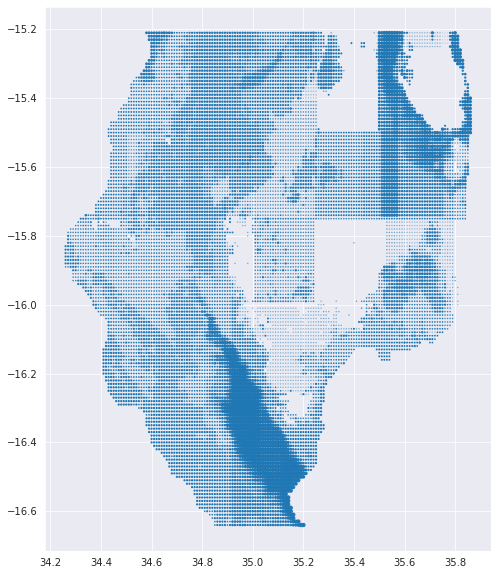

In [78]:
figure=plt.figure(figsize=(8,10))
plt.scatter(train["X"].values,train["Y"].values,pred*10)